Iteration 0: loss = 0.6931
Iteration 100: loss = 0.1619
Iteration 200: loss = 0.1055
Iteration 300: loss = 0.0824
Iteration 400: loss = 0.0692
Iteration 500: loss = 0.0605
Iteration 600: loss = 0.0543
Iteration 700: loss = 0.0495
Iteration 800: loss = 0.0457
Iteration 900: loss = 0.0426
Training Accuracy: 100.00%


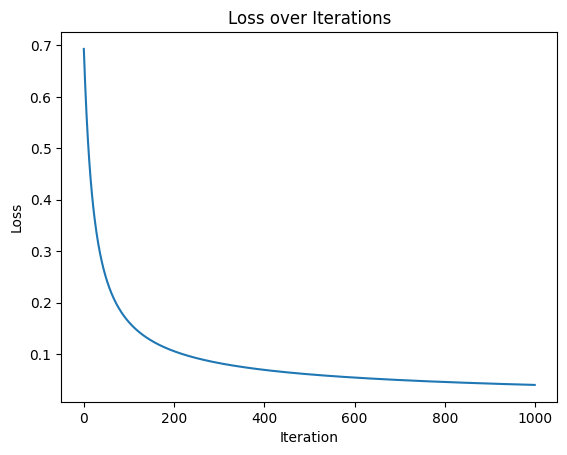

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(url, header=None, names=columns)

# FILTERATION OF DATASET TO INCLUDE ONLY : Iris-setosa and Iris-versicolor
df = df[df["class"].isin(["Iris-setosa", "Iris-versicolor"])]
X = df[["sepal_length", "sepal_width"]].values
# Convert to binary classification: Iris-setosa - 0, Iris-versicolor - 1
y = df["class"].apply(lambda x: 0 if x == "Iris-setosa" else 1).values

# Feature normalization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.1, num_iter=1000, verbose=True):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.verbose = verbose

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Fitting the logistic regression model using Gdescent
        self.losses = []
        # Add intercept term (bias) to X
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))

        # Initialize weights (including bias)
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            # Linear combination
            z = np.dot(X, self.theta)
            # Predicted probabilities
            h = self.sigmoid(z)
            # Compute gradient
            gradient = np.dot(X.T, (h - y)) / y.size
            # Update weights
            self.theta -= self.learning_rate * gradient
            # Compute and record loss (binary cross-entropy)
            loss = -np.mean(y * np.log(h + 1e-15) + (1 - y) * np.log(1 - h + 1e-15))
            self.losses.append(loss)
            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}: loss = {loss:.4f}")

    def predict_prob(self, X):
        """Predict probability estimates for inputs."""
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        """Predict binary labels for inputs."""
        return (self.predict_prob(X) >= threshold).astype(int)

# Create and train our logistic regression model
model = LogisticRegressionScratch(learning_rate=0.1, num_iter=1000, verbose=True)
model.fit(X_norm, y)

# Predict on the training data
predictions = model.predict(X_norm)

# Calculate accuracy
accuracy = np.mean(predictions == y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

# Plot the loss over iterations
plt.plot(model.losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss over Iterations")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
Valu

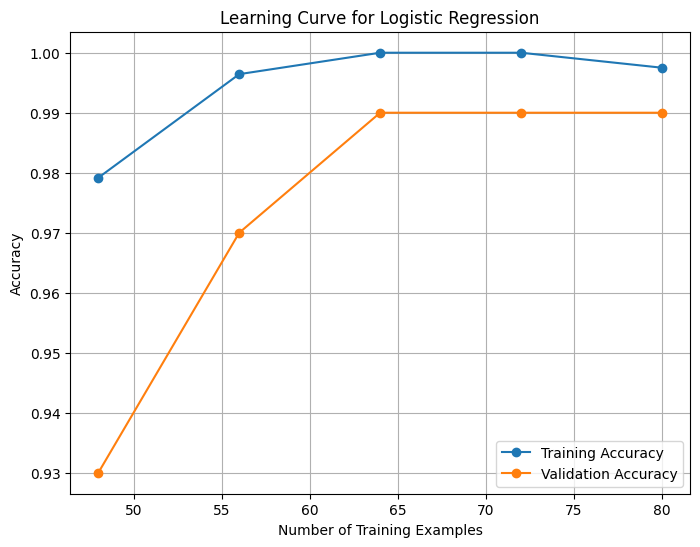

In [13]:
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(url, header=None, names=columns)

# Filter to include only two classes: Iris-setosa and Iris-versicolor
df = df[df["class"].isin(["Iris-setosa", "Iris-versicolor"])]
X = df[["sepal_length", "sepal_width"]].values
y = df["class"].apply(lambda x: 0 if x == "Iris-setosa" else 1).values

# Normalize features
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Create the logistic regression model
model = LogisticRegression()

# Use learning_curve to track training and validation scores as we increase training data size
train_sizes, train_scores, val_scores = learning_curve(
    model, X_norm, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy', random_state=42
)

# Calculate mean scores across cross-validation folds
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Validation Accuracy")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend(loc="best")
plt.grid(True)
plt.show()



In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(url, header=None, names=columns)

# Filter to include only two classes: Iris-setosa and Iris-versicolor
df = df[df["class"].isin(["Iris-setosa", "Iris-versicolor"])]
X = df[["sepal_length", "sepal_width"]].values
y = df["class"].apply(lambda x: 0 if x == "Iris-setosa" else 1).values

# Normalize features
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_norm, y)

# Evaluate the model on the training data
predictions = model.predict(X_norm)
accuracy = accuracy_score(y, predictions)
print(f"Training Accuracy: {accuracy * 100:.2f}%")


Training Accuracy: 100.00%
